In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My\ Drive/hbi2019/sra_food

/content/gdrive/My Drive/hbi2019/sra_food


In [0]:
ls

gt_food_23accesions.pkl                merged.vcf.gz.mv.vcf
gt_food_23accesions_withHWEpvalue.pkl


In [0]:
import pandas as pd

df_food = pd.read_pickle('./gt_food_23accesions.pkl')

In [0]:
df_food.head()

,SRR7501150,SRR7501160,SRR7501167,SRR7501181,SRR7505765,SRR7505768,SRR7505771,SRR7505773,SRR7505774,SRR7505779,SRR7505780,SRR7505869,SRR7505873,SRR7505877,SRR7505879,SRR7505880,SRR7505882,SRR7505889,SRR7505890,SRR7511299,SRR7527615,SRR7834586,SRR7850029
0,CC,CC,AA,AA,AA,CC,CC,AA,CC,CC,CC,CC,CC,CC,AA,AA,CC,AA,CC,CC,CC,AA,AA
1,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,CC,CC,CC,CC,CC,TT,CC,TT,TT
2,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,TT,TT
3,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,CC,CC
4,TT,TT,CC,CC,CC,TT,CC,CC,TT,TT,TT,TT,TT,CC,CC,CC,TT,CC,CC,CC,TT,CC,CC


**day7 내용**

* hardy weinberg equilibrim
* allele frequency : p and q
* genotype frequency based on allele frequency : p^2, 2pq, q^2
* observed genotype frequency : observation
* chi-square test

**day8**

* fixation index (inbreeding coefficient) : for hetero genotype
 1. estimate hetero genotype : 2pq use
 2. observe and count hetero genotype : observation
* fixation index (inbreeding coefficient) = (Hetero Count estimate - Hetero Count observation) / Hetero Count estimate
* Index값이 1이면 hetero가 아예 없다는 것 = 순종(homo)임을 알 수 있음

In [0]:
# each calculation for each row (iteration for each row)

for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  print(gt_pool)

['CC' 'CC' 'AA' 'AA' 'AA' 'CC' 'CC' 'AA' 'CC' 'CC' 'CC' 'CC' 'CC' 'CC'
 'AA' 'AA' 'CC' 'AA' 'CC' 'CC' 'CC' 'AA' 'AA']
['CC' 'CC' 'CC' 'CC' 'CC' 'CC' 'CC' 'CC' 'CC' 'CC' 'CC' 'CC' 'CC' 'TT'
 'CC' 'CC' 'CC' 'CC' 'CC' 'TT' 'CC' 'TT' 'TT']
['GG' 'GG' 'GG' 'GG' 'GG' 'GG' 'GG' 'GG' 'GG' 'GG' 'GG' 'GG' 'GG' 'GG'
 'GG' 'GG' 'GG' 'GG' 'GG' 'GG' 'GG' 'TT' 'TT']


In [0]:
import numpy as np
for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  print(allele_pool)

[['C' 'C']
 ['C' 'C']
 ['A' 'A']
 ['A' 'A']
 ['A' 'A']
 ['C' 'C']
 ['C' 'C']
 ['A' 'A']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['A' 'A']
 ['A' 'A']
 ['C' 'C']
 ['A' 'A']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['A' 'A']
 ['A' 'A']]
[['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['T' 'T']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['C' 'C']
 ['T' 'T']
 ['C' 'C']
 ['T' 'T']
 ['T' 'T']]
[['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['G' 'G']
 ['T' 'T']
 ['T' 'T']]


In [0]:
for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = allele_pool.ravel() # 다차원 배열을 1차원 배열로 바꿔줌
  print(allele_pool)

['C' 'C' 'C' 'C' 'A' 'A' 'A' 'A' 'A' 'A' 'C' 'C' 'C' 'C' 'A' 'A' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'A' 'A' 'A' 'A' 'C' 'C' 'A' 'A'
 'C' 'C' 'C' 'C' 'C' 'C' 'A' 'A' 'A' 'A']
['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'T' 'T' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'T' 'T' 'C' 'C' 'T' 'T' 'T' 'T']
['G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G'
 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G'
 'G' 'G' 'G' 'G' 'G' 'G' 'T' 'T' 'T' 'T']


In [0]:
for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = allele_pool.ravel()
  allele_list = set(allele_pool)
  print(allele_list)

 # 각 row에 있는 allele 종류를 알 수 있음

{'A', 'C'}
{'T', 'C'}
{'G', 'T'}


In [0]:
for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = list(allele_pool.ravel())
  allele_list = set(allele_pool)
  dic_allele2count = {x:allele_pool.count(x) for x in allele_list}
  print(dic_allele2count)

# 각 row당 존재하는 allele의 종류와 갯수를 알 수 있음

{'A': 18, 'C': 28}
{'T': 8, 'C': 38}
{'G': 42, 'T': 4}


In [0]:
for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = list(allele_pool.ravel())
  allele_list = set(allele_pool)
  dic_allele2count = {x:allele_pool.count(x) for x in allele_list}
  total_number_allele = len(allele_pool)
  print(total_number_allele)

# 각 row당 존재하는 allele의 총 갯수를 알 수 있음

46
46
46


In [0]:
for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = list(allele_pool.ravel())
  allele_list = set(allele_pool)
  total_number_allele = len(allele_pool)
  dic_allele2count = {x:allele_pool.count(x) for x in allele_list}
  dic_allele2frq = {x:allele_pool.count(x) / total_number_allele for x in allele_list}
  print(dic_allele2frq)

# 각 row당 존재하는 allele의 존재 비율을 알 수 있음

{'A': 0.391304347826087, 'C': 0.6086956521739131}
{'T': 0.17391304347826086, 'C': 0.8260869565217391}
{'G': 0.9130434782608695, 'T': 0.08695652173913043}


In [0]:
for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = list(allele_pool.ravel())
  allele_list = set(allele_pool)
  total_number_allele = len(allele_pool)
  dic_allele2count = {x:allele_pool.count(x) for x in allele_list}
  dic_allele2frq = {x:allele_pool.count(x) / total_number_allele for x in allele_list}
  p,q = dic_allele2frq.values()
  print(p,q)

0.391304347826087 0.6086956521739131
0.17391304347826086 0.8260869565217391
0.9130434782608695 0.08695652173913043


In [0]:
for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = list(allele_pool.ravel())
  allele_list = set(allele_pool)
  total_number_allele = len(allele_pool)
  dic_allele2count = {x:allele_pool.count(x) for x in allele_list}
  dic_allele2frq = {x:allele_pool.count(x) / total_number_allele for x in allele_list}
  p,q = dic_allele2frq.values()
  print(p,q,2*p*q)

# allele의 frequency로 자손의 genotype frequency 예측가능

0.391304347826087 0.6086956521739131 0.4763705103969755
0.17391304347826086 0.8260869565217391 0.2873345935727788
0.9130434782608695 0.08695652173913043 0.15879017013232513


In [0]:
for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = list(allele_pool.ravel())
  allele_list = set(allele_pool)
  total_number_allele = len(allele_pool)
  dic_allele2count = {x:allele_pool.count(x) for x in allele_list}
  dic_allele2frq = {x:allele_pool.count(x) / total_number_allele for x in allele_list}
  p,q = dic_allele2frq.values()
  hetero_gt_frq_est = 2*p*q
  print(hetero_gt_frq_est)

0.4763705103969755
0.2873345935727788
0.15879017013232513


In [0]:
for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = list(allele_pool.ravel())
  allele_list = set(allele_pool)
  total_number_allele = len(allele_pool)
  dic_allele2count = {x:allele_pool.count(x) for x in allele_list}
  dic_allele2frq = {x:allele_pool.count(x) / total_number_allele for x in allele_list}
  p,q = dic_allele2frq.values()
  hetero_gt_frq_est = 2*p*q
  hetero_gt_count_est = hetero_gt_frq_est * len(gt_pool)
  print(hetero_gt_frq_est, hetero_gt_count_est)

0.4763705103969755 10.956521739130435
0.2873345935727788 6.608695652173912
0.15879017013232513 3.652173913043478


In [0]:
dic_allele2frq.keys()

dict_keys(['G', 'T'])

In [0]:
list(dic_allele2frq.keys())

['G', 'T']

In [0]:
gt_het = list(dic_allele2frq.keys())
gt_het1 = ''.join(gt_het)
gt_het2 = ''.join(gt_het[::-1])

In [0]:
gt_het1, gt_het2

('GT', 'TG')

In [0]:
for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = list(allele_pool.ravel())
  allele_list = set(allele_pool)
  total_number_allele = len(allele_pool)
  dic_allele2count = {x:allele_pool.count(x) for x in allele_list}
  dic_allele2frq = {x:allele_pool.count(x) / total_number_allele for x in allele_list}
  p,q = dic_allele2frq.values()
  hetero_gt_frq_est = 2*p*q
  hetero_gt_count_est = hetero_gt_frq_est * len(gt_pool)
  
  gt_het = list(dic_allele2frq.keys())
  gt_het1 = ''.join(gt_het)
  gt_het2 = ''.join(gt_het[::-1]) # make the list reversed
  gt_pool = list(gt_pool)
  hetero_gt_count_obs = gt_pool.count(gt_het1) + gt_pool.count(gt_het2)
  
  print(hetero_gt_frq_est, hetero_gt_count_est, hetero_gt_count_obs)

0.4763705103969755 10.956521739130435 0
0.2873345935727788 6.608695652173912 0
0.15879017013232513 3.652173913043478 0


In [0]:
for eachrow in df_food.index[0:3] :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = list(allele_pool.ravel())
  allele_list = set(allele_pool)
  total_number_allele = len(allele_pool)
  dic_allele2count = {x:allele_pool.count(x) for x in allele_list}
  dic_allele2frq = {x:allele_pool.count(x) / total_number_allele for x in allele_list}
  p,q = dic_allele2frq.values()
  hetero_gt_frq_est = 2*p*q
  hetero_gt_count_est = hetero_gt_frq_est * len(gt_pool)
  
  gt_het = list(dic_allele2frq.keys())
  gt_het1 = ''.join(gt_het)
  gt_het2 = ''.join(gt_het[::-1]) # make the list reversed
  gt_pool = list(gt_pool)
  hetero_gt_count_obs = gt_pool.count(gt_het1) + gt_pool.count(gt_het2)
  
  fixation_index = (hetero_gt_count_est - hetero_gt_count_obs) / hetero_gt_count_est
  
  print('%s fixation_index : '%eachrow , fixation_index)

0 fixation_index :  1.0
1 fixation_index :  1.0
2 fixation_index :  1.0


In [0]:
import numpy as np
from tqdm import tqdm_notebook

fixation_index_list = []
hetero_rate_list = []

for eachrow in tqdm_notebook(df_food.index) :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = list(allele_pool.ravel())
  allele_list = set(allele_pool)
  total_number_allele = len(allele_pool)
  dic_allele2count = {x:allele_pool.count(x) for x in allele_list}
  dic_allele2frq = {x:allele_pool.count(x) / total_number_allele for x in allele_list}
  print(eachrow)
  p,q = dic_allele2frq.values()
  hetero_gt_frq_est = 2*p*q
  hetero_gt_count_est = hetero_gt_frq_est * len(gt_pool)
  
  gt_het = list(dic_allele2frq.keys())
  gt_het1 = ''.join(gt_het)
  gt_het2 = ''.join(gt_het[::-1]) # make the list reversed
  gt_pool = list(gt_pool)
  hetero_gt_count_obs = gt_pool.count(gt_het1) + gt_pool.count(gt_het2)
  
  fixation_index = (hetero_gt_count_est - hetero_gt_count_obs) / hetero_gt_count_est
  hetero_rate = hetero_gt_count_obs / len(gt_pool)
  
  fixation_index_list.append(fixation_index)
  hetero_rate_list.append(hetero_rate)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23



ValueError: ignored

In [0]:
df_food.loc[23] # allele 종류가 A, T, C 로 3개다

SRR7501150    AT
SRR7501160    AC
SRR7501167    AA
SRR7501181    AA
SRR7505765    AA
SRR7505768    AA
SRR7505771    AA
SRR7505773    AA
SRR7505774    AA
SRR7505779    AA
SRR7505780    AA
SRR7505869    AA
SRR7505873    AA
SRR7505877    AA
SRR7505879    AA
SRR7505880    AA
SRR7505882    AA
SRR7505889    AA
SRR7505890    AA
SRR7511299    AA
SRR7527615    AA
SRR7834586    AA
SRR7850029    AA
Name: 23, dtype: object

In [0]:
import numpy as np
from tqdm import tqdm_notebook

fixation_index_list = []
hetero_rate_list = []

for eachrow in tqdm_notebook(df_food.index) :
  gt_pool = df_food.loc[eachrow].values
  allele_pool = np.stack([list(x) for x in gt_pool])
  allele_pool = list(allele_pool.ravel())
  allele_list = set(allele_pool)
  total_number_allele = len(allele_pool)
  dic_allele2count = {x:allele_pool.count(x) for x in allele_list}
  dic_allele2frq = {x:allele_pool.count(x) / total_number_allele for x in allele_list}
  try :
    p,q = dic_allele2frq.values()
  except ValueError :
    fixation_index_list.append(-99)
    hetero_rate_list.append(-99)
    continue
  hetero_gt_frq_est = 2*p*q
  hetero_gt_count_est = hetero_gt_frq_est * len(gt_pool)
  print(eachrow)
  
  gt_het = list(dic_allele2frq.keys())
  gt_het1 = ''.join(gt_het)
  gt_het2 = ''.join(gt_het[::-1]) # make the list reversed
  gt_pool = list(gt_pool)
  hetero_gt_count_obs = gt_pool.count(gt_het1) + gt_pool.count(gt_het2)
  
  fixation_index = (hetero_gt_count_est - hetero_gt_count_obs) / hetero_gt_count_est
  hetero_rate = hetero_gt_count_obs / len(gt_pool)
  
  fixation_index_list.append(fixation_index)
  hetero_rate_list.append(hetero_rate)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
24
25
26
27
28
29
30
31
33
34
35
36
37
38
39
40
41
42
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
62
63
64
65
66
67
68
69
70



ValueError: ignored

In [0]:
df_food.loc[71] # genotype이 allele 2개 이상이거나 정보가 없음

SRR7501150    TGTG
SRR7501160    TGTG
SRR7501167    TGTG
SRR7501181    TGTG
SRR7505765    TGTG
SRR7505768    TGTG
SRR7505771    TGTG
SRR7505773    TGTG
SRR7505774      NN
SRR7505779      NN
SRR7505780    TGTG
SRR7505869    TGTG
SRR7505873    TGTG
SRR7505877    TGTG
SRR7505879    TGTG
SRR7505880    TGTG
SRR7505882    TGTG
SRR7505889    TGTG
SRR7505890    TGTG
SRR7511299    TGTG
SRR7527615    TGTG
SRR7834586     TGT
SRR7850029     TGT
Name: 71, dtype: object

In [0]:
import numpy as np
from tqdm import tqdm_notebook

fixation_index_list = []
hetero_rate_list = []

for eachrow in tqdm_notebook(df_food.index) :
  gt_pool = df_food.loc[eachrow].values
  try :
    allele_pool = np.stack([list(x) for x in gt_pool])
  except ValueError :
    fixation_index_list.append(-99)
    hetero_rate_list.append(-99)
    continue
  allele_pool = list(allele_pool.ravel())
  allele_list = set(allele_pool)
  total_number_allele = len(allele_pool)
  dic_allele2count = {x:allele_pool.count(x) for x in allele_list}
  dic_allele2frq = {x:allele_pool.count(x) / total_number_allele for x in allele_list}
  try :
    p,q = dic_allele2frq.values()
  except ValueError :
    fixation_index_list.append(-99)
    hetero_rate_list.append(-99)
    continue
  hetero_gt_frq_est = 2*p*q
  hetero_gt_count_est = hetero_gt_frq_est * len(gt_pool)
  
  gt_het = list(dic_allele2frq.keys())
  gt_het1 = ''.join(gt_het)
  gt_het2 = ''.join(gt_het[::-1]) # make the list reversed
  gt_pool = list(gt_pool)
  hetero_gt_count_obs = gt_pool.count(gt_het1) + gt_pool.count(gt_het2)
  
  fixation_index = (hetero_gt_count_est - hetero_gt_count_obs) / hetero_gt_count_est
  hetero_rate = hetero_gt_count_obs / len(gt_pool)
  
  fixation_index_list.append(fixation_index)
  hetero_rate_list.append(hetero_rate)

In [0]:
fixation_index_list[10:30]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -0.022222222222222324,
 -0.022222222222222324,
 -99,
 -0.022222222222222324,
 -0.04545454545454542,
 -0.022222222222222324,
 -0.022222222222222324,
 -0.022222222222222324,
 -0.022222222222222324]

In [0]:
hetero_rate_list[10:30]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.043478260869565216,
 0.043478260869565216,
 -99,
 0.043478260869565216,
 0.08695652173913043,
 0.043478260869565216,
 0.043478260869565216,
 0.043478260869565216,
 0.043478260869565216]

In [0]:
df_food['fixation index'] = fixation_index_list #HWE를 가정으로 예상처럼 나왔는지 보는 것, 1이면 hetero가 없음, 이미 모든 자리가 allele이 하나뿐이라는 것
df_food['hetero rate'] = hetero_rate_list

In [0]:
df_food.head()

# 각 index(locus)별로 fixation index와 hetero rate를 찾아볼 수 있음

,SRR7501150,SRR7501160,SRR7501167,SRR7501181,SRR7505765,SRR7505768,SRR7505771,SRR7505773,SRR7505774,SRR7505779,SRR7505780,SRR7505869,SRR7505873,SRR7505877,SRR7505879,SRR7505880,SRR7505882,SRR7505889,SRR7505890,SRR7511299,SRR7527615,SRR7834586,SRR7850029,fixation index,hetero rate
0,CC,CC,AA,AA,AA,CC,CC,AA,CC,CC,CC,CC,CC,CC,AA,AA,CC,AA,CC,CC,CC,AA,AA,1.0,0.0
1,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,CC,CC,CC,CC,CC,TT,CC,TT,TT,1.0,0.0
2,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,TT,TT,1.0,0.0
3,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,CC,CC,1.0,0.0
4,TT,TT,CC,CC,CC,TT,CC,CC,TT,TT,TT,TT,TT,CC,CC,CC,TT,CC,CC,CC,TT,CC,CC,1.0,0.0


In [0]:
df_food[10:30]

,SRR7501150,SRR7501160,SRR7501167,SRR7501181,SRR7505765,SRR7505768,SRR7505771,SRR7505773,SRR7505774,SRR7505779,SRR7505780,SRR7505869,SRR7505873,SRR7505877,SRR7505879,SRR7505880,SRR7505882,SRR7505889,SRR7505890,SRR7511299,SRR7527615,SRR7834586,SRR7850029,fixation index,hetero rate
10,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,CC,TT,TT,TT,TT,TT,TT,TT,TT,1.000000,0.000000
11,GG,GG,GG,GG,GG,GG,AA,GG,GG,GG,GG,GG,GG,GG,GG,AA,GG,AA,GG,GG,GG,AA,AA,1.000000,0.000000
12,AA,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,1.000000,0.000000
13,CC,CC,GG,GG,GG,CC,GG,GG,CC,CC,CC,CC,CC,GG,CC,GG,CC,GG,CC,GG,CC,GG,GG,1.000000,0.000000
14,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,TT,1.000000,0.000000
15,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,AA,AA,1.000000,0.000000
16,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,CC,CC,1.000000,0.000000
17,GG,GG,CC,CC,CC,GG,CC,CC,GG,GG,GG,GG,GG,CC,CC,CC,GG,CC,CC,CC,GG,GG,GG,1.000000,0.000000
18,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,AA,CC,AA,CC,CC,CC,CC,CC,1.000000,0.000000
19,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,TT,GG,GG,GG,GG,GG,TT,GG,GG,GG,1.000000,0.000000


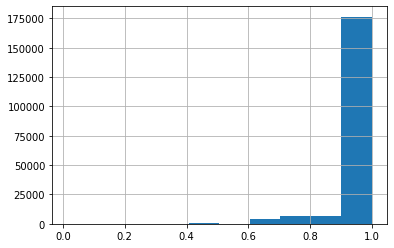

In [0]:
m = df_food['fixation index'] > 0
df_food['fixation index'][m].hist()

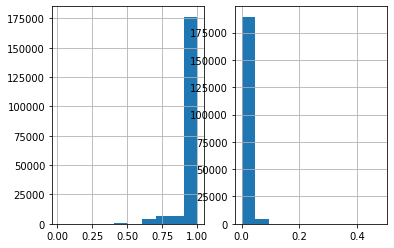

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
m = df_food['fixation index'] > 0
df_food['fixation index'][m].hist(ax=ax[0])
df_food['hetero rate'][m].hist(ax=ax[1])

# fixation index가 1이면 순종임을 알 수 있듯이, fixation index가 1에 가까운만큼 hetero rate는 0에 가까운 것을 볼 수 있다

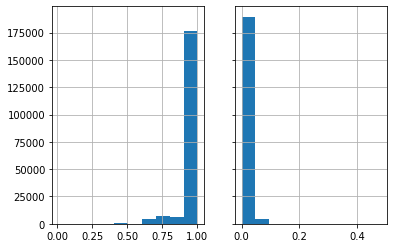

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, sharey=True) # 모든 subplot이 같은 y축 눈금을 사용하도록 설정
m = df_food['fixation index'] > 0
df_food['fixation index'][m].hist(ax=ax[0])
df_food['hetero rate'][m].hist(ax=ax[1])

Text(0.5, 1.0, 'hetero_rate')

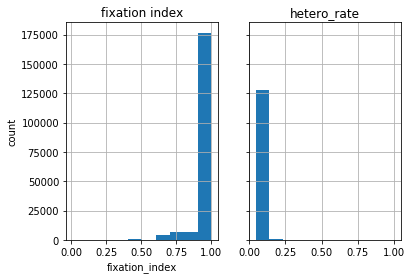

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, sharey=True)
m = df_food['fixation index'] > 0
df_food['fixation index'][m].hist(ax=ax[0])
ax[0].set_xlabel('fixation_index')
ax[0].set_ylabel('count')
ax[0].set_title('fixation index')

m = df_food['hetero rate'] > 0
df_food['hetero rate'][m].hist(ax=ax[1])
ax[1].set_title('hetero_rate')
#plt.savefig('statistics_for_hetero.png',dpi=300,bbox_inches='tight')

Text(0.5, 0, 'hetero_rate')

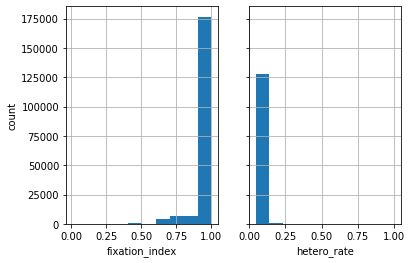

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,sharey=True)
m = df_food['fixation index'] > 0
df_food['fixation index'][m].hist(ax=ax[0])
ax[0].set_xlabel('fixation_index')
ax[0].set_ylabel('count')
m = df_food['hetero rate'] > 0
df_food['hetero rate'][m].hist(ax=ax[1])
ax[1].set_xlabel('hetero_rate')
#plt.savefig('statistics_for_hetero.png',dpi=300,bbox_inches='tight')

# 각 subplot에 해당하는 title을 달아줌

In [0]:
# one by one locus 
# Now, we can calculate pvalue

![manhattan plot](https://upload.wikimedia.org/wikipedia/commons/1/12/Manhattan_Plot.png)

---